In [69]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [4]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
SYN_DATA_FOLDER = os.path.join(CURRENT_FOLDER, "data", "synt_datasets")
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")

In [5]:
binary3d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary3d.csv'))
binary4d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary4d.csv'))
adult_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'cleaned_adult_train_data.csv'))

In [6]:
A_vs_B_df = pd.crosstab(binary3d_df["A"], binary3d_df["B"])

In [7]:
A_vs_B_df

B,0,1
A,,
0,24797,25050
1,25031,25122


In [8]:
chi2_stat, p, dof, expected = stats.chi2_contingency(A_vs_B_df)

print(chi2_stat)
print(p)
print(dof)
print(expected)

0.2593850267172252
0.610542964726764
1
[[24837.76316 25009.23684]
 [24990.23684 25162.76316]]


In [9]:
A_vs_C_df = pd.crosstab(binary3d_df["A"], binary3d_df["C"])

In [10]:
A_vs_C_df

C,0,1
A,,
0,24952,24895
1,13385,36768


In [11]:
chi2_stat, p, dof, expected = stats.chi2_contingency(A_vs_C_df)

print(chi2_stat)
print(p)
print(dof)
print(expected)

5774.218088592714
0.0
1
[[19109.84439 30737.15561]
 [19227.15561 30925.84439]]


In [12]:
def count_expected_value(contigency_table):
    total = contigency_table.to_numpy().sum()
    row_sum = np.sum(contigency_table.iloc[0])
    column_sum = np.sum(contigency_table.iloc[:,0])
    expected = (row_sum * column_sum) / total
    return expected

In [13]:
count_expected_value(A_vs_B_df)

24837.76316

In [19]:
def calculate_pairwise_independence_ranking(df, return_p = False):
    columns = df.columns
    column_pairs = list(itertools.combinations(columns, 2))
    ranking = []
    for pair in column_pairs:
        crosstab_df = pd.crosstab(df[pair[0]], df[pair[1]])
        chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab_df)
        if return_p == True:
            ranking.append((pair, chi2_stat, p))
        else:
            ranking.append((pair, chi2_stat))
    
    sorted_ranking = sorted(ranking, key=lambda x: x[1], reverse=False)
    
    return sorted_ranking

In [20]:
calculate_pairwise_independence_ranking(binary3d_df)

[(('A', 'B'), 0.2593850267172252),
 (('B', 'C'), 0.3284871901984492),
 (('A', 'C'), 5774.218088592714)]

In [21]:
calculate_pairwise_independence_ranking(binary4d_df)

[(('A', 'C'), 0.019495122488665556),
 (('B', 'D'), 0.04529012920036457),
 (('A', 'B'), 0.34664135243101496),
 (('B', 'C'), 0.9435563573806336),
 (('A', 'D'), 3370.3994767349027),
 (('C', 'D'), 12616.812878896342)]

In [22]:
adult_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,compensation,had-capital-gains,had-capital-losses
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0,0
30158,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0,0
30159,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0,0
30160,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0,0


In [23]:
calculate_pairwise_independence_ranking(adult_df)

[(('race', 'had-capital-losses'), 24.690277099449805),
 (('race', 'had-capital-gains'), 29.70984141243233),
 (('workclass', 'had-capital-losses'), 47.53173465804493),
 (('sex', 'had-capital-losses'), 52.6989349559476),
 (('native-country', 'had-capital-gains'), 62.28370486633404),
 (('native-country', 'had-capital-losses'), 76.8524714139601),
 (('sex', 'had-capital-gains'), 134.36526486773948),
 (('had-capital-gains', 'had-capital-losses'), 136.47514740610606),
 (('sex', 'native-country'), 143.5104133498522),
 (('workclass', 'had-capital-gains'), 154.46287667772305),
 (('marital-status', 'had-capital-losses'), 181.2030945660446),
 (('hours-per-week', 'had-capital-losses'), 202.3663259371236),
 (('relationship', 'had-capital-losses'), 205.61399741102082),
 (('occupation', 'had-capital-losses'), 215.95984437410985),
 (('age', 'had-capital-losses'), 220.64168802090322),
 (('education-num', 'sex'), 250.19501893764044),
 (('education-num', 'had-capital-losses'), 260.38988398728196),
 (('rac

In [27]:
adult_df_reduced = adult_df[['age', 'workclass', 'education-num', 'marital-status', 'race', 'sex']]

In [30]:
calculate_pairwise_independence_ranking(adult_df_reduced)

[(('education-num', 'sex'), 250.19501893764044),
 (('age', 'race'), 361.47619994342926),
 (('workclass', 'race'), 398.33384876147755),
 (('race', 'sex'), 434.63747698869236),
 (('age', 'sex'), 506.71759813555514),
 (('workclass', 'sex'), 634.2371427089755),
 (('education-num', 'race'), 687.5793983318999),
 (('marital-status', 'race'), 845.0064209157549),
 (('workclass', 'marital-status'), 1081.2606703538006),
 (('education-num', 'marital-status'), 1363.9565277890947),
 (('workclass', 'education-num'), 2183.3790380791597),
 (('age', 'workclass'), 2448.790487396327),
 (('marital-status', 'sex'), 6553.390554598343),
 (('age', 'education-num'), 9322.197421890136),
 (('age', 'marital-status'), 14735.599191393907)]

/tmp/ipykernel_232867/1867664373.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  categories = dict(zip(list(adult_df.columns), np.array(ord_enc.categories_).transpose()))


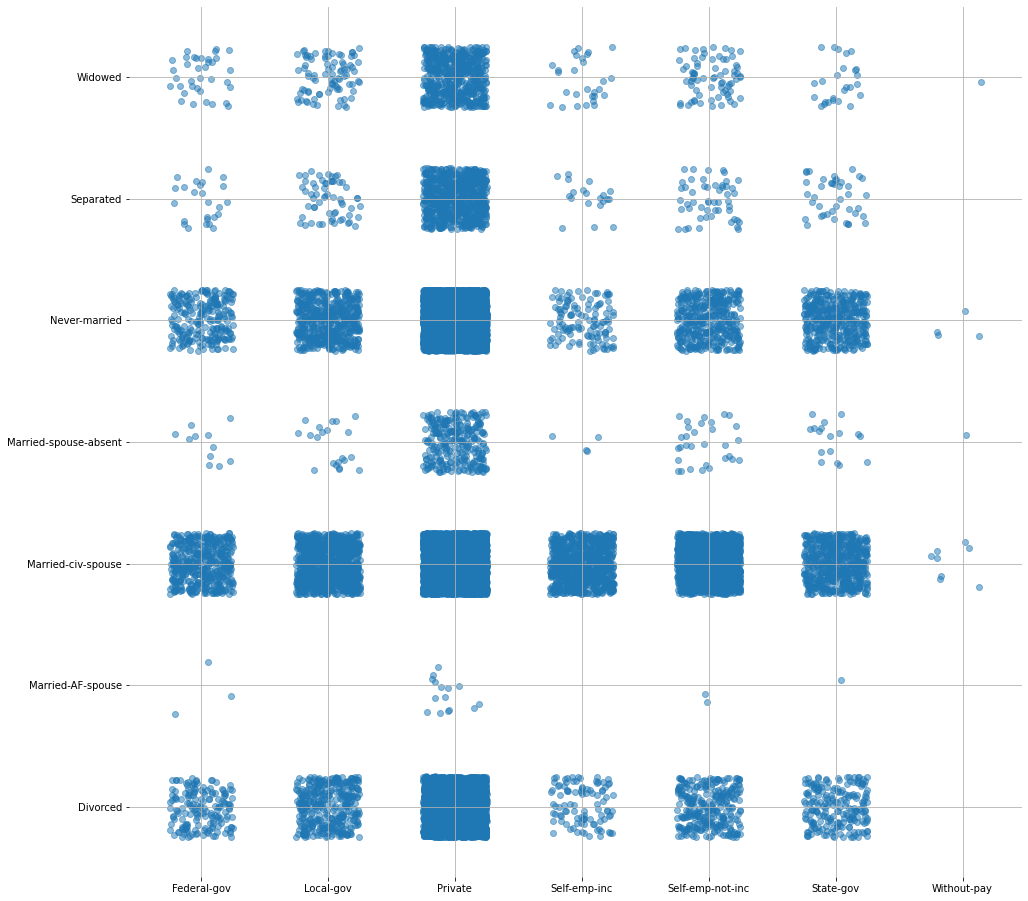

In [71]:
ord_enc = OrdinalEncoder()
enc_df = pd.DataFrame(ord_enc.fit_transform(adult_df), columns=list(adult_df.columns))
categories = dict(zip(list(adult_df.columns), np.array(ord_enc.categories_).transpose()))

xnoise, ynoise = np.random.random(len(adult_df)) / 2 - 0.25, np.random.random(len(adult_df)) / 2 - 0.25

variable_1 = 'workclass'
variable_2 = 'marital-status'

plt.figure(figsize=(16, 16))
plt.scatter(enc_df[variable_1] + xnoise, enc_df[variable_2] + ynoise, alpha=0.5)
plt.xticks(list(range(len(categories[variable_1]))), categories[variable_1])
plt.yticks(list(range(len(categories[variable_2]))), categories[variable_2]) 
plt.grid()
sns.despine(left=True, bottom=True)
plt.show()

In [110]:
six_columns = ["education-num", "relationship", "age", "sex", "hours-per-week", "compensation"]

# Make set of sets
marginal_pairs = list(itertools.combinations(six_columns, 2))

full_set_of_marginals = marginal_pairs

immutable_set_remove = lambda element, list_obj: list(filter(lambda x: set(x) != set(element), list_obj))

test_queries = [immutable_set_remove(pair, full_set_of_marginals) for pair in marginal_pairs]

In [111]:
from pprint import pprint

print(marginal_pairs)
print(len(marginal_pairs))
print(full_set_of_marginals)
print(len(full_set_of_marginals))
pprint(test_queries)
print(len(test_queries[0]))

[('education-num', 'relationship'), ('education-num', 'age'), ('education-num', 'sex'), ('education-num', 'hours-per-week'), ('education-num', 'compensation'), ('relationship', 'age'), ('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'compensation'), ('age', 'sex'), ('age', 'hours-per-week'), ('age', 'compensation'), ('sex', 'hours-per-week'), ('sex', 'compensation'), ('hours-per-week', 'compensation')]
15
[('education-num', 'relationship'), ('education-num', 'age'), ('education-num', 'sex'), ('education-num', 'hours-per-week'), ('education-num', 'compensation'), ('relationship', 'age'), ('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'compensation'), ('age', 'sex'), ('age', 'hours-per-week'), ('age', 'compensation'), ('sex', 'hours-per-week'), ('sex', 'compensation'), ('hours-per-week', 'compensation')]
15
[[('education-num', 'age'),
  ('education-num', 'sex'),
  ('education-num', 'hours-per-week'),
  ('education-num', 'compen

In [120]:
["+".join(map(str, pair)) for pair in list(set(full_set_of_marginals) - set(test_queries[0]))]

['education-num+relationship']